# Descriptive Statistics


Welcome to the notebook on descriptive statistics. Statistics is a very large field. People even go to grad school for it. For our site here, we will focus on some of the big hitters in statistics that make you a good data scientist. This is a cursory, whirlwind overview by somebody who has no letters after his name. So any mistakes or corrections, blame someone who does. And then send me an email or submit a pull request on Github and we'll square it away in no time.

Descriptive statistics are measurements that describe a population (or sample of that population) of values. They tell you where the center tends to be, how spread out the values are, the shape of the distribution, and a bunch of other things that gradute students have put in their theses. But here we focus on some of the simpler values that you have to know to consider yourself a functional human, let alone data scientist. So follow along as we take a \$5 hop-on hop-off tour of some of our basic statistics.

# Requirements

We'll use two 3rd party Python libraries for displaying graphs. Run from terminal or shell:

> pip3 install seaborn

> pip3 install pandas

In [38]:
import seaborn as sns
import random as random
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Random
We'll use the random module a lot to generate random numbers to make fake datasets. The plain vanilla random generator will pull from a uniform distribution. There are also options to pull from other datasets. As we add more tools to our data science toolbox, we'll find that NumPy's random number generators to be more full-featured and play really nicely with Pandas, another key data science library. For now, we're going to avoid the overhead of learning another library and just use Python's standard library.

In [2]:
random.seed(42)
values = [random.randrange(1,1001,1) for _ in range(10000)]
values[0:10]

[655, 115, 26, 760, 282, 251, 229, 143, 755, 105]

# len() & sum()
The building blocks of average. Self explanatory here.

In [3]:
len(values)

10000

In [4]:
sum(values)

5021696

Below we'll use Seaborn to plot and visualize some of our data. Don't worry about this too much. Visualization, while important, is not the focus of this notebook.

<AxesSubplot:>

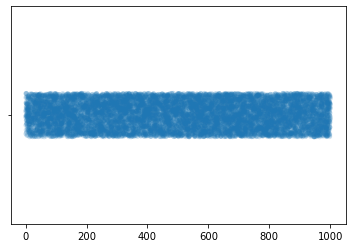

In [5]:
sns.stripplot(x=values, jitter=True, alpha=0.2)

This graph is pretty cluttered. That makes sense because it's 10,000 values between 1 and 1,000. That tells us there should be an average of 10 entries for each value. I'll leave counting this average as an exercise for the reader.

Let's make a sparse number line with just 200 values between 1 and 1000. There should be a lot more white space.

<AxesSubplot:>

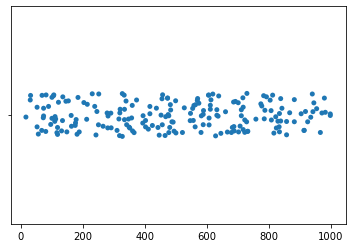

In [6]:
sparse_values = [random.randrange(1,1001) for _ in range (200)]
sns.stripplot(x=sparse_values, jitter=True)

# max() & min()
These built-in functions are useful for getting the range of our data, and just general inspection:

In [7]:
print("Max value: {}\nMin value: {}".format(
    max(values), min(values)))

Max value: 1000
Min value: 1


# sorted()
Another very important technique in wrangling data is sorting it. If we have a dataset of salaries, for example, and we want to see the 10 top earners, this is how we'd do it. Let's look now at the first 20 items in our sorted data set. Probably won't be too exciting though:

In [8]:
sorted_vals = sorted(values)
sorted_vals[0:20]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3]

If we wanted to sort values in-place (as in, perform an action like values = sorted(values)), we would use the list class' own sort() method:

values.sort()

# The Mean

The mean is a fancy statistical way to say "average." You're all familiar with what average means. But mathemeticians like to be special and specific. There's not just one type of mean. In fact, we'll talk about 3 kinds of "means" that are all useful for different types of numbers.

1. Arithmetic mean for common numbers
2. Geometric mean for returns or growth
3. Harmonic mean for ratios and rates

# 1. Arithmetic mean
This is your typical average. You've used it all your life. It's simply the sum of the elements divided by the length. Intuitively, think of it as if you made every element the exact same value so that the sum of all values remains the same as before. What would that value be?

Mathematically the mean, denoted $\mu$, looks like:

$$\mu = \frac{x_1 + x_2 + \cdots + x_n}{n}$$
where $\bar{x}$ is our mean, $x_i$ is a value at the $i$th index of our list, and $n$ is the length of that list.

In Python, it's a simple operation combining two builtins we saw above: sum() and len()

In [9]:
def arithmetic_mean(vals):
    return sum(vals) / len(vals)

arithmetic_mean(values)

502.1696

From this we see our average value is 502.1696. Let's double check that with our intuitive definition using the sum:

In [11]:
avg_sum = len(values) * arithmetic_mean(values) #10,000 * 502.1696
print("{} =? {}".format(sum(values), avg_sum))

5021696 =? 5021696.0


# 2. Geometric mean
The geometric mean is a similar idea but instead uses the product. It says if I multiply each value in our list together, what one value could I use instead to get the same result?

The geometric mean is very useful in things like growth or returns (e.g. stocks) because adding returns doesn't give us the ability to get returns over a longer length of time. In other words, if I have a stock growing at 5% per year, what will be the total returns after 5 years?

If you said 25%, you are wrong. It would be $1.05^5 - 1 \approx 27.63\%$

Mathematically, our geometric is: $$ GM(x) = \sqrt[n]{x_1 \times x_2 \times \cdots \times x_n }$$

In [12]:
returns = [1.05, 1.06, .98, 1.08]

def product(vals):
    ''' 
    This is a function that will multiply every item in the list
    together reducing it to a single number. The Pythonic way to
    do this would be to use the 'reduce' function like so:
    > reduce(lambda x, y: x * y, vals)
    We are explicit here for clairty.
    '''
    prod = 1
    for x in vals:
        prod = prod * x
    return prod

def geometric_mean(vals):
    geo_mean = product(vals) ** (1/len(vals)) # raising to 1/n is the same as nth root
    return geo_mean

geom = geometric_mean(returns)
geom

1.041804547674296

Using our product function above, we can easily multiply all the values together to get what your return after 4 years is:

In [13]:
product(returns)


1.1779992000000004

or roughly $17.8\%$. Using our geometric mean should give us the same result:



In [15]:
geom**4

1.1779992

Now look at what happens with the arithmetic mean:

In [16]:
arm = arithmetic_mean(returns)
arm

1.0425

In [17]:
arm**4

1.1811478250390623

The arithmetic mean would tell us that after 4 years, we should have an $18.1\%$ return. But we know it should actually be a $17.8\%$ return. It can be tricky to know when to use the arithmetic and geometric means. You also must remember to add the $1$ to your returns or it will not mathematically play nice.

# 3. Harmonic mean
This one is also a bit tricky to get intuitively. Here we want an average of rates. Not to be confused with an average of returns. Recall a rate is simply a ratio between two quantities, like the price-to-earnings ratio of a stock or miles-per-hour of a car.

Let's take a look at the mph example. If I have a car who goes 60mph for 50 miles, 50mph for another 50, and 40mph for yet another 50, then the car has traveled 150 miles in $\frac{50mi}{60\frac{mi}{h}} + \frac{50mi}{50\frac{mi}{h}} + \frac{50mi}{40\frac{mi}{h}} = 3.08\bar{3}h$. This corresponds to a geometric mean of $150mi \div 3.08\bar{3}h \approx 48.648mph$. Much different from our arithmetic mean of 50mph.

(Note: if in our example the car did not travel a clean 50 miles for every segment, we have to use a weighted harmonic mean.)

Mathematically, the harmonic mean looks like this:

$$ \frac{n}{\frac{1}{x_1}+\frac{1}{x_2}+\cdots+\frac{1}{x_n}} $$
So let's code that up:

In [18]:
speeds = [60, 50, 40]

def harmonic_mean(vals):
    sum_recip = sum(1/x for x in vals)
    return len(vals) / sum_recip

harmonic_mean(speeds)

48.648648648648646


Now you know about the three Pythagorean means. Thank me after you brag at your next party. Let's now move on to something very important in descriptive statistics:

# The Median
The median should be another familiar statistic, but often misquoted. When somebody is describing a set of numbers with just a mean, they might not be telling the whole story. For example, many sets of values are skewed (a concept we will cover in the histogram section) in that most values are clustered around a certain area but have a long tail. Prices are usually good examples of this. Most wine is around \$15-20, but we've all seen those super expensive bottles from a hermit's chateau in France. Salaries are also skewed (and politicians like to remind us how far skewed just 1\% of these people are).

A useful statistic in these cases is the "median." The median gives us the middle value, as opposed to the average value. Here's a simple, but illustrative example:

Suppose we take the salaries of 5 people at a bar

[12000, 48000, 72000, 160000, 3360000]

If I told you the average salary in this bar right now is \$730,400, I'd be telling you the truth. But you can tell that our rich friend pulling in over 3 million is throwing off the curve. When he goes home early to do a business, the average drops to just \\$73,000. A full 10 times less.

The median instead in this case is much more consistent, or in other words, not as prone to outliers. To find the median, we simply take the middle value. Or if there are an even number of entries, we take the average of the two middle values. Here it is in Python:

In [19]:
salaries = [12000, 48000, 72000, 160000, 3360000]

def median(vals):
    n = len(vals)
    sorted_vals = sorted(vals)
    midpoint = n // 2
    
    if n % 2 == 1:
        return sorted_vals[midpoint]
    else:
        return arithmetic_mean([sorted_vals[midpoint-1], sorted_vals[midpoint]])
    
median(salaries)

72000

A much more reasonable \$7200! Now let's see what happens when Moneybags goes home:

In [20]:
median(salaries[:-1])

60000.0

The median drops down to \$60,000 (which is the average of \\$48,000 and \$72,000).

Let's take a look at our original values list of 10,000 numbers.



In [21]:
median(values)


506.0

In [22]:
# Recall our values list is even, meaning 506.0 was both item 5000 and 5001
len(values)

10000

In [23]:
# Lopping off the end returns the same value
median(values[:-1])

506

In [24]:
#Why? There are 9 506s in the list
from collections import Counter
c = Counter(values)
c[506]

9


Above we used the Counter class in the standard library. This class is a subclass of the dict that holds a dictionary of keys to their counts. We can build our own version of it like so:

In [25]:
# Here we use the defaultdict that will initialize our first value if it doesn't yet exist
from collections import defaultdict
def make_counter(values):
    counts = defaultdict(int)
    for v in values:
        counts[v] += 1
    return counts

counts = make_counter([1, 2, 2, 3, 5, 6, 6, 6])
counts

defaultdict(int, {1: 1, 2: 2, 3: 1, 5: 1, 6: 3})

Remember this part because it will show up very soon when we talk about histograms, the chef's knife of a data scientist's data exploration kitchen.

But first, there's one more descriptive statistic that we should cover. And that is



# The Mode
The mode is simply the most common element. If there are multiple elements with the same count, then there are two modes. If all elements have the same count, there are no modes. If the distribution is continuous (meaning it can take uncountably infinite values, which we will discuss in the Distributions chapter), then we use ranges of values to determine the mode. Honestly, I don't really find the mode too useful. A good time to use it is if there's a lot of categorical data (meaning values like "blue", "red", "green" instead of numerical data like 1,2,3). You might want to know what color car your dealership has the most of.

Let's take a look at that example now. I've built a set of cars with up to 20 cars of any of four colors.

In [26]:
car_colors = ["red"] * random.randint(1,20) + \
    ["green"] * random.randint(1,20) + \
    ["blue"] * random.randint(1,20) + \
    ["black"] * random.randint(1,20)
car_colors

['red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black']

In [27]:
#Using our familiar counter
color_count = Counter(car_colors)
color_count

Counter({'red': 20, 'green': 13, 'blue': 11, 'black': 16})

In [29]:
# We can see the mode above is 'blue' because we have 18. Let's verify:
def mode(counter):
    # store a list of name:count tuples in case multiple modes
    modes = [('',0)]
    for k,v in counter.items():
        highest_count = modes[0][1]
        if v > highest_count:
            modes = [(k,v)]
        elif v == highest_count:
            modes.append((k,v))
        
    return modes
mode(color_count)

[('red', 20)]

In [30]:
# If we have multiple modes?
mode(Counter(['blue']*3 + ['green']*3 + ['black']*2))

[('blue', 3), ('green', 3)]

But that's enough about modes. Check out wikipedia if you want more because there's no point spending more time on them then they're worth.

Hang in there, because we're getting close. Still to come is Percentiles, Boxplots, and Histograms. Three very import things.

Let's get to it.

# Percentiles
A percentile is familiar to anyone who has taken the SAT. It answers the question: what percentage of students are dumber than I am? Well the College Board would love to tell you: congratulations, you're in the 92nd percentile!

Let's take a look at our old friend Mr. values with 10,000 numbers from 1-1000. Since this list is uniformly distributed, meaning every value is as likely to occur as any other, we expect that 25% of the numbers to be below 250, 50% to be below 500, and 75% to be below 750. Let's verify:

In [31]:
def percentile(vals, elem):
    '''Returns the percent of numbers
    below the index.
    '''
    count = 0
    sorted_val = sorted(values)
    for val in sorted_val:
        if val > elem:
            return count/len(values)
        count += 1

for num in [250, 500, 750]:
    print("Percentile for {}: {}%".format(num, percentile(values, num)*100))

Percentile for 250: 24.37%
Percentile for 500: 49.45%
Percentile for 750: 75.48%


Just like we'd expect. Now if the data set is not so nice and uniform, we expect these values to be quite different. Let's write a function to give us an element at a particular percentile:

In [32]:
from math import ceil
def pct_value(vals, pct):
    sorted_vals = sorted(vals)
    n = len(vals)
    return sorted_vals[ceil(n*pct)]

for pct in [.25, .5, .75]:
    print("Element at percentile {}%: {}".format(pct*100, pct_value(values, pct)))

Element at percentile 25.0%: 256
Element at percentile 50.0%: 506
Element at percentile 75.0%: 745


Notice how the element at the 50th percentile is also our median! Now we have a second definition of the median.

Let's take a look now at a highly skewed set. It will range from 0-100 but we'll cluster it around 10

In [33]:
skewed = []
for i in range(1,100):
    skewed += [i]*random.randint(0,int(4+i//abs(10.1-i)))

In [34]:
def print_statistics(vals, calc_mode=True):
    print("Count: {}".format(len(vals)))
    print("Mean: {:.2f}".format(arithmetic_mean(vals)))
    print("Median: {}".format(median(vals)))
    if calc_mode: print("Mode: {}".format(mode(Counter(vals))))
    print("Max: {}".format(max(vals)))
    print("Min: {}".format(min(vals)))
    print("Range: {}".format(max(vals)-min(vals)))
    for pct in [.25, .5, .75]:
        print("{:.0f}th Percentile: {}".format(pct*100, pct_value(vals, pct)))
    print("IQR: {}".format(pct_value(vals, 0.75) - pct_value(vals, 0.25)))

print_statistics(skewed)

Count: 296
Mean: 45.49
Median: 43.5
Mode: [(10, 18)]
Max: 99
Min: 3
Range: 96
25th Percentile: 15
50th Percentile: 44
75th Percentile: 71
IQR: 56


A few clues that this distribution is skewed:

1. The mean is significantly different from the median
2. The percentiles cluster around 25. A uniform distribution we'd expect 25, 50, and 75 for our percentiles.
3. The max i smuch higher than the mean, median, or even 75th percentile.

Let's take a look at a simple plot to describe all of these statistics to us:

# The Boxplot
Also sometimes the Box-and-Whisker plot, this is a great way to visualize a lot of the information our print_statistics function displayed. In particular, we can see in one graph

1. Median
2. 75th percentile (called the third quartile)
3. 25th percentile (called the first quartile)
4. The reach ($\pm1.5*IQR$), which shows outliers

It does not show the mean, but it can be intuited by looking at the plot. Let's take a look at plots for values and skewed:

<AxesSubplot:>

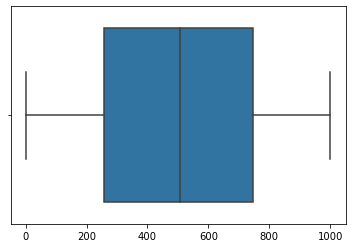

In [39]:
sns.boxplot(values)

<AxesSubplot:>

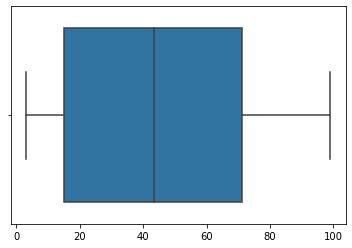

In [40]:
sns.boxplot(skewed)

Looks pretty different? Instead of being centered around 50, it looks like the box is centered around 40. The median is at 27 and much of the box is to the right of it. This shows us that the distribution is skewed to the right.

There's another important way to visualize a distribution and that is

# Histogram
Ah, the moment we've all been waiting for. I keep teaching you ways to describe a dataset, but sometimes a picture is worth a thousand words. That picture is the Histogram.

A histogram is a bar chart in which the values of the dataset are plotted horizontally on the X axis and the frequencies (i.e. how many times that value was seen) are plotted on the Y axis. If you remember our functions to make a counter, a histogram is essentially a chart of those counts.

Think for a minute on what the histogram for our uniform dataset of 10,000 randomly generated numbers would look like? Pretty boring right?

<AxesSubplot:>

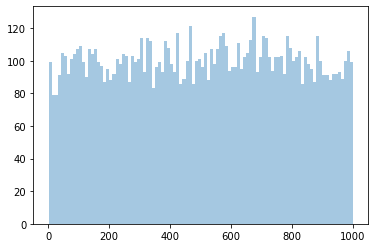

In [41]:
# Seaborn gives an easy way to plot histograms. Plotting from scratch is beyond the
# scope of the programming we will do
sns.distplot(values, kde=False, bins=100)

Seaborn's helpful sns.distplot() method simply turns a dataset into a histogram for us. The bins parameter allows us to make bins where instead of the frequency count of each variable, we plot the frequency count of a range of variables. This is very useful when we have continuous distribution (i.e. one that can take an infinite number of values of the range), as plotting every individual value is unfeasible and would make for an ugly graph.

Let's take a look at our skewed data:

<AxesSubplot:>

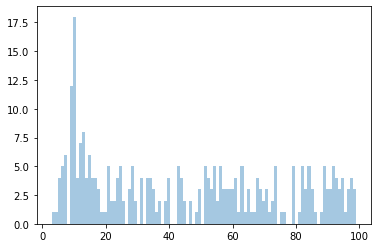

In [42]:
sns.distplot(skewed, kde=False, bins=100)


The data has tons of values around 10, and everything else hovers around 4. This type of distribution is called "unimodal" in that it has one peak, or one "contender" for the mode. Practically, unimodal and bimodal are incredibly common.

I'm going to jump ahead to the next notebooks where we generate and describe different types of these distributions, how they're used, and how to describe them. One of the most basic and fundamental distribution in statistics is the unimodal Normal (or Gaussian) distribution. It's the familiar bell-curve. Let's use a simple, albeit slow, function to generate numbers according to the normal distribution

In [43]:
from math import sqrt, log, cos, sin, pi

def generateGauss():
    x1 = random.random() # generate a random float in [0,1.0)
    x2 = random.random()
    y1 = sqrt(-2 *log(x1)) * cos(2*pi*x2)
    y2 = sqrt(-2*log(x1)) * sin(2*pi*x2)
    return y1, y2

gaussValues = []
for _ in range(10000):
    gaussValues += list(generateGauss())

In [44]:
#Let's take a peek:
gaussValues

[-1.036806535851344,
 0.3365492703063446,
 0.5647644201425441,
 1.323097124551028,
 -0.885320982302321,
 -0.47188093578604334,
 0.047955459881986705,
 0.5746934606014507,
 -0.9949409228291612,
 0.6240862352894445,
 -0.737497940821195,
 0.8159414648985025,
 -0.19085374583120554,
 -0.08711326444119062,
 0.6336776194126372,
 0.5458029565386199,
 -0.4415302083425239,
 -1.1254387957138152,
 -0.2316635552123139,
 -1.9618758135950882,
 0.181016500910358,
 -0.018640409906697582,
 -0.6898932607586278,
 0.15449923407619964,
 1.7386317193410077,
 -1.439877162467125,
 -2.169523559856579,
 0.3793227617997027,
 0.7492898393014542,
 -0.1903235409249126,
 -1.5073686196574534,
 -1.6816162998031756,
 -0.25700927845784616,
 0.6204783572860695,
 -1.3449988539073687,
 2.0185244702901306,
 -0.694110065359546,
 0.1375284963852512,
 -1.1344392650330999,
 0.22208165797042825,
 -0.6918524976872877,
 0.37461714634861243,
 0.08462300587477241,
 -0.27068848442544163,
 1.536544154600503,
 0.34676685110505784,
 -0.0

In [45]:
# and print our statistics
print_statistics(gaussValues, calc_mode=False)

Count: 20000
Mean: -0.01
Median: 0.0036879466906248612
Max: 4.291088338639748
Min: -4.52593184929381
Range: 8.817020187933558
25th Percentile: -0.6838808785947806
50th Percentile: 0.003702001124439471
75th Percentile: 0.6659626230118323
IQR: 1.349843501606613


The nature of the function is such that the mean should fall around 0. It looks like we accompished that. Also note how the 25th and 50th percentile are roughly the same number. This is an indication that the distribution is not significantly skewed. Let's take a look at it's histogram:

<AxesSubplot:>

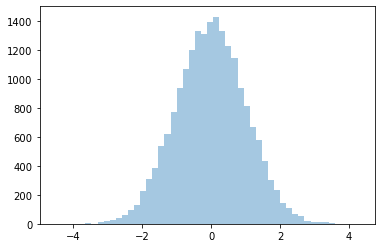

In [46]:
sns.distplot(gaussValues, kde=False)


Get used to this image because you will see it everywhere in statistics, data science, and life. Even though there are many many distributions out there (and even more variations on each of those), most people will be happy to apply the "bell curve" to almost anything. Chance are, though, they're right.

# Variability
Let's talk about one more descriptive statistic that describes to us how much the values vary. In other words, if we're looking at test scores, did everyone do about the same? Or were there some big winners and losers?

Mathemeticians call this the variability. There are three major measures of variability: range, inter-quartile range (IQR), and variation/standard devaition.

# 1. Range
Range is a very simple measure: how far apart could my values possibly be? In our generated datasets above, the answer was pretty obvious. We generated a random number from 0 to 1000, so the range was $1000-0 = 1000$. The values of x could never go outside of this range.

But what about our gaussian values? The tandard normal distribution has asymptotic end points instead of absolute end points, so it's not so clean. We can see from the graph above that it doesn't look like there are any values above and below 4, so we'd expect a range of something around 8:

In [47]:
print("Max: {}\nMin: {}\nRange: {}".format(
    max(gaussValues),
    min(gaussValues),
    max(gaussValues) - min(gaussValues)))

Max: 4.291088338639748
Min: -4.52593184929381
Range: 8.817020187933558


Exactly what we expected. In practice, the range is a good descriptive statistic, but you can't do many other interesting things with it. It basically let's you say "our results were between X and Y", but nothing too much more profound.

Another good way to describe the range is called

# 2. Inter-Quartile Range
or IQR for short. This is a similar technique where instead of taking the difference between the max and min values, we take the difference between the 75th and 25th percentile. It gives a good sense of the range because it excludes outliers and tells you where the middle 50% of the values are grouped. Of course, this is most useful when we're looking at a unimodal distribution like our normal distribution, because for a distribution that's bimodal (i.e. has many values at either end of the range), it will be misleading.

Here's how we caluclated it:

In [48]:
print("75th: {}\n25th: {}\nIQR: {}".format(
    pct_value(gaussValues, .75),
    pct_value(gaussValues, .25),
    pct_value(gaussValues, .75) - pct_value(gaussValues, .25)
))

75th: 0.6659626230118323
25th: -0.6838808785947806
IQR: 1.349843501606613


So again, this tells us that 50% of our values are between -0.68 and 0.68 and all within the same 1.35 values. Comparing this to the range (which is not at all influenced by percentages of values), this gives you the sense that the're bunched around the mean.

If we want a little more predictive power, though, it's time to talk about



# 3. Variance
Variance is a measure of how much values typically deviate (i.e. how far away they are) from the mean.

If we want to calculate the variance, then we first see how far a value is from the mean ($\mu$), square it (which gets rid of the negative), sum them up, and divide by $n$. Essentially, it's an average where the value is the deviation squared instead of the value itself. Here's the formula for variance, denoted by $\sigma^2$:

$$ \sigma^2 = \frac{(x_1 - \mu)^2+(x_2 - \mu)^2+ \cdots + (x_n - \mu)^2}{n} $$
Let's code that up:

In [49]:
def variance(vals):
    n = len(vals)
    m = arithmetic_mean(vals)
    variance = 0
    for x in vals:
        variance += (x - m)**2
    return variance/n

variance(gaussValues)


1.006504331810301

The variance four our generated Gaussian numbers is roughly 1, which is another condition of a standard normal distribution (mean is 0, variance is 1). So no surprise. But the variance is a bit of a tricky number to intuit because it is the average of the squared differences between the mean. Take our skewed for example:



In [50]:
variance(skewed)

904.1215759678595


How do you interpret this? The max value is 100, so is a variance of 934.8 a lot or a little? Also, let's say the skewed distribution was a measure of price in dollars. Therefore, the units of variance would be 934.8 dollars squared. Doesn't make a whole lot of sense.

For this reason, most people will take the square root of the variance to give them a value called the standard deviation: $\sigma = \sqrt{\sigma^2}$.

In [51]:
def stddev(vals):
    return sqrt(variance(vals))
stddev(skewed)

30.068614467046192

This is much more approchable. It's saying the standard devaition from our mean is \$30. That is an easy number to digest. This is a very important number to be able to grok. I'll repeat it to drive the point home:

The standard deviation is a measure of how "spread out" a distribution is. The higher the value, the further a typical observation from our population is from the mean of that population.

The standard devation, range, and IQR all give measures of this dispersion of a distribution. However, for reasons we will see later, the standard devaition is the work horse of them all. By knowing the standard deviation of a population (or sample, as the case often is), we can begin to judge how likely a value is to get, or how sure we are of our own guesses. Statistics is a glorified guessing game, and stddev is one of the most important tools.